# K-Means Application : Image Segmentation

### Import the necessary libraries

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

### Read the image file and convert it to NumPy Array

In [2]:
def ReadImage(img_file):
    img_arr = mpimg.imread(img_file)
    plt.imshow(img_arr)
    return(img_arr)

(321, 481, 3)
(321, 481)


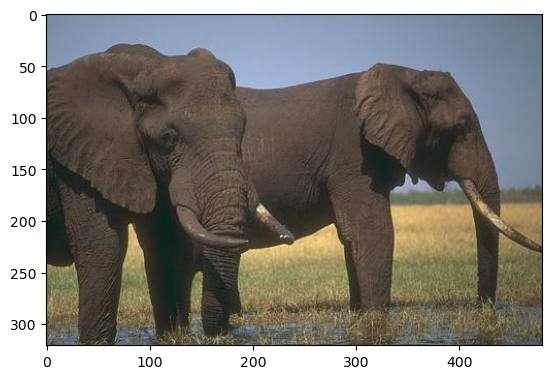

In [3]:
image_arr = ReadImage("test.jpg")
print(image_arr.shape)
label_arr = np.zeros((image_arr.shape[0],image_arr.shape[1]))
print(label_arr.shape)

###  Assign random labels to individual pixels

In [4]:
K = 15 ## K is the number of clusters that we want to create

for i in range(label_arr.shape[0]):
    for j in range(label_arr.shape[1]):
        label_arr[i,j] = np.random.choice(K)
print(label_arr)

[[ 6.  4. 12. ... 14.  3.  7.]
 [ 3.  4.  3. ... 13.  5.  9.]
 [10. 11.  4. ...  0.  7. 13.]
 ...
 [ 9.  9. 14. ... 14.  5.  8.]
 [10.  3.  5. ...  6. 13.  0.]
 [ 4.  7.  7. ... 14. 11. 12.]]


### Define the $p^{th}$ order distance metric

The Minkowski distance of order $p$ (where $p$ is an integer) between two points

$X=(x_{1},x_{2},\ldots ,x_{n})$ and $Y=(y_{1},y_{2},\ldots ,y_{n})$ $\in \mathbb {R} ^{d}$ is defined as:

$$ D\left(X,Y\right)=\left(\sum _{i=1}^{d}|x_{i}-y_{i}|^{p}\right)^{\frac {1}{p}} $$

In [5]:
def dist_p(vec1,vec2,p):  # Generalised Distance Formula
    L = len(vec1)
    s1 = 0
    for l in range(L):
        diff = np.abs(vec2[l]-vec1[l])
        s1 = s1 + diff**p
    distance = s1**(1/p)
    return(distance)

### Define function to generate the initial mean values from initial labels

In [6]:
def init_mean(K,img_arr,label_arr):
    mean_ls = [] ## List containing mean values of the clusters
    pixel_ls = [[] for k in range(K)] ## Create list of empty lists to store pixels belonging to a certain cluster

    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k:  ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value

    for k in range(K):
        pixel_mat = np.matrix(pixel_ls[k])
        mean_k = np.mean(pixel_mat,axis=0)
        mean_ls.append(np.ravel(mean_k))
    return(mean_ls)

### Update labels by comparing distances with previous mean values and generate new labels

In [7]:
def label_update(prev_mean,img_arr,label_arr,p):
    for i in range(img_arr.shape[0]):
        for j in range(img_arr.shape[1]):
            dist_ls = []
            for k in range(len(prev_mean)):
                dist = dist_p(img_arr[i,j,:],prev_mean[k],p) ## Calculate the distance of the pixel at [i,j] with the kth mean
                dist_ls.append(dist) ## Put the distance values in a list
            dist_arr = np.array(dist_ls) ## Convert it to a NumPy array
            new_label = np.argmin(dist_arr) ##The new_label of the point is the one which is closest to the pixel at [i,j]
            label_arr[i,j] = new_label ## Set the new label
    return(label_arr)

### Generate new mean values from the updated labels

In [8]:
def mean_from_label(K,prev_mean,img_arr,label_arr):
    pixel_ls = [[] for k in range(K)]  ## Create list of empty lists to store pixels belonging to a certain cluster

    for i in range(label_arr.shape[0]):
        for j in range(label_arr.shape[1]):
            for k in range(K):
                if label_arr[i,j] == k: ## if the label of the pixel at location [i,j] is 'k'
                    pixel_ls[k].append(np.ravel(img_arr[i,j,:])) ## Fill the kth empty list with this pixel value

    for k in range(K):
        if len(pixel_ls[k]) != 0:  ## Only update the means of those clusters which has received at least one new point, else retain the old mean value
            pixel_mat = np.matrix(pixel_ls[k])
            mean_k = np.mean(pixel_mat,axis=0)
            prev_mean[k] = np.ravel(mean_k)
    new_mean = prev_mean
    return(new_mean)

### Run the K-Means Algorithm and obtain the final labels and means

In [9]:
def KMeans(img_arr,label_arr,K,p,maxIter):
    mean_old = init_mean(K,img_arr,label_arr)
    for t in range(maxIter):
        new_label_arr = label_update(mean_old,img_arr,label_arr,p)
        mean_new = mean_from_label(K,mean_old,img_arr,new_label_arr)
        print("The mean obtained at {}th iteration is {}\n".format(t,mean_new))
        label_arr = new_label_arr ## Update the label array
        mean_old = mean_new ## Update the mean values
    return(mean_new,label_arr)

In [10]:
mean_final,label_final = KMeans(image_arr,label_arr,K,2,5)

The mean obtained at 0th iteration is [array([93.2972973 , 98.37837838, 97.        ]), array([ 98.07142857, 100.5       ,  88.35714286]), array([140.41523111, 143.88527422, 140.07347552]), array([108.96117274,  96.77824315,  75.85872764]), array([71.08677636, 63.75446679, 54.0552468 ]), array([100., 105.,  85.]), array([ 97.53846154, 101.92307692,  90.15384615]), array([98.30769231, 94.71153846, 98.60897436]), array([101.28236769,  97.83351007,  89.60079051]), array([93.06756757, 99.59459459, 99.2972973 ]), array([101.26324852,  98.01980103,  90.05863784]), array([102.,  97.,  91.]), array([114.4111986 , 102.75065617,  80.92475941]), array([101.34038992,  97.97282395,  89.77441906]), array([92.69565217, 95.5       , 97.0942029 ])]

The mean obtained at 1th iteration is [array([93.98684211, 98.96052632, 94.63157895]), array([91.80769231, 91.00986193, 79.88954635]), array([146.30605145, 153.45441301, 156.87934071]), array([100.30464431,  87.35868964,  72.04068374]), array([63.70050521, 5

### Use the finally obtained mean and labels to segment the image

In [11]:
def segmentImage(image_arr,label_arr,mean_ls):
    seg_image = np.zeros((image_arr.shape[0],image_arr.shape[1],image_arr.shape[2]))
    for i in range(seg_image.shape[0]):
        for j in range(seg_image.shape[1]):
            k = label_arr[i,j]
            seg_image[i,j,:] = mean_ls[int(k)]
    seg_image = seg_image.astype(np.uint8)
    plt.imshow(seg_image)

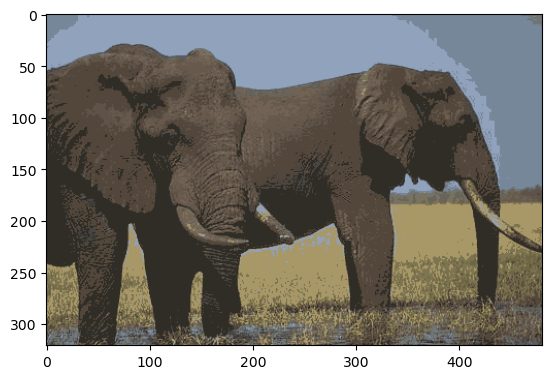

In [12]:
segmentImage(image_arr,label_final,mean_final)